In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import set_config
set_config(display="diagram")

In [2]:
df = pd.read_csv("power_transformer_custom_dataset.csv")
df

,X1,X2,X3,Y
0,5.745156,0.366602,1.727078,15.656146
1,4.182327,0.220898,1.056467,9.289542
2,6.195630,2.023568,2.590743,12.503195
3,9.597618,2.451590,2.824857,21.535558
4,3.986539,0.064191,1.056705,9.861817
...,...,...,...,...
995,3.894050,0.658907,9.302720,13.704962
996,11.010433,0.463845,0.826244,27.684125
997,6.174460,1.453708,0.335486,13.694219
998,3.368308,0.011042,1.215972,7.936188


In [13]:
df.describe()

,X1,X2,X3,Y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.113431,2.015972,3.061358,11.290366
std,2.766055,2.005977,2.526011,8.226866
min,0.886359,0.006447,0.028598,-15.855323
25%,3.242048,0.567909,1.231473,6.461998
50%,4.538744,1.451862,2.443758,10.215534
75%,6.196422,2.743369,4.085038,15.098216
max,30.764633,14.883446,25.242583,79.317046


In [4]:
df.isnull().sum()

X1    0
X2    0
X3    0
Y     0
dtype: int64

In [10]:
X = df.drop(columns=["Y"])
X

,X1,X2,X3
0,5.745156,0.366602,1.727078
1,4.182327,0.220898,1.056467
2,6.195630,2.023568,2.590743
3,9.597618,2.451590,2.824857
4,3.986539,0.064191,1.056705
...,...,...,...
995,3.894050,0.658907,9.302720
996,11.010433,0.463845,0.826244
997,6.174460,1.453708,0.335486
998,3.368308,0.011042,1.215972


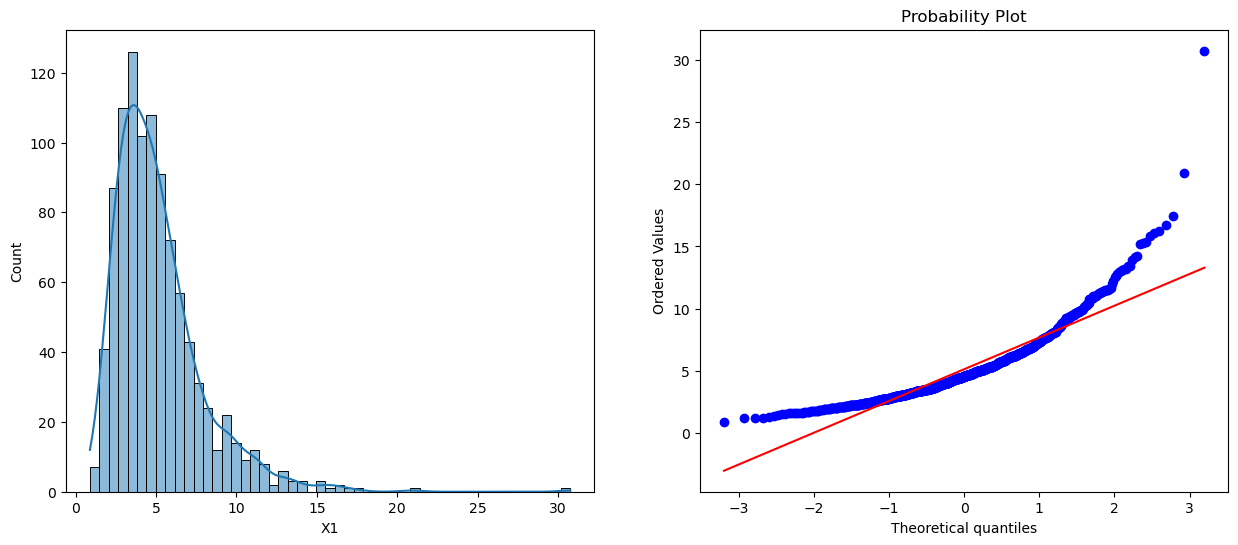

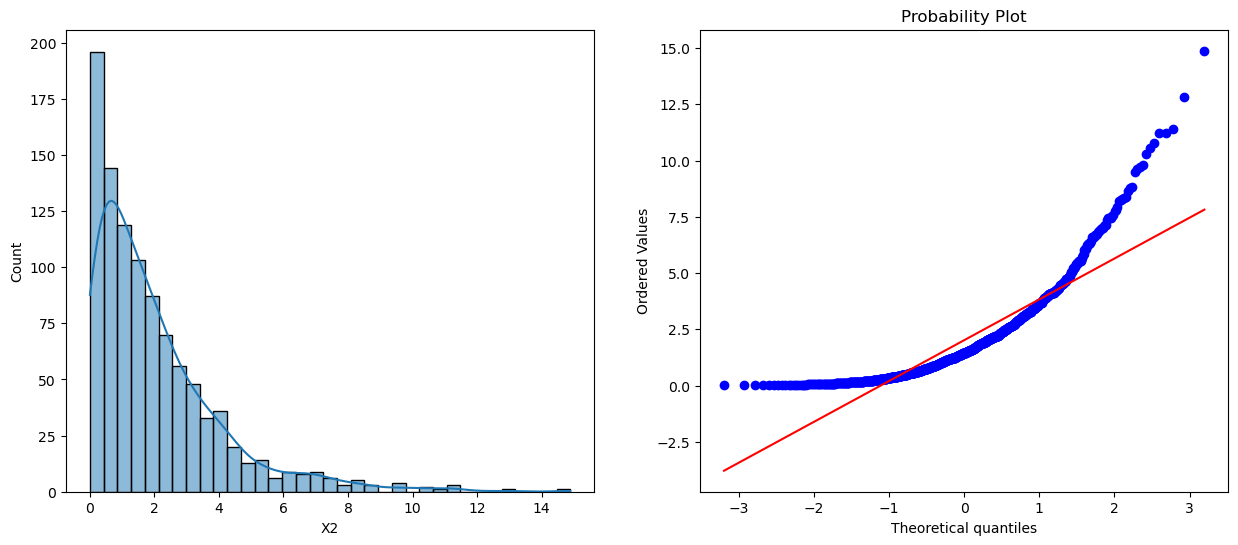

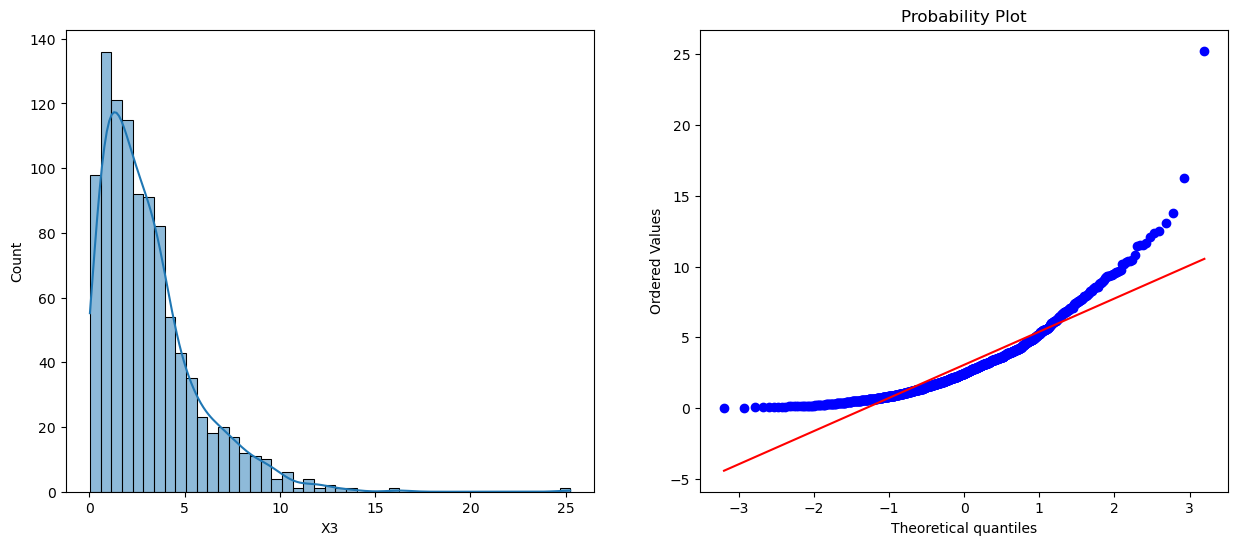

In [11]:
for col in X.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(df[col],kde=True)
    plt.subplot(122)
    stats.probplot(df[col],dist="norm",plot=plt)

plt.show()

In [22]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
tf1 = ColumnTransformer([("X",PowerTransformer(),[0,1,2])], remainder="passthrough")

In [37]:
X_trans = tf1.fit_transform(X)
X_trans = pd.DataFrame(X_trans,columns=X.columns)
X_trans

,X1,X2,X3
0,0.513127,-1.121230,-0.381965
1,-0.146071,-1.371886,-0.892243
2,0.666426,0.401521,0.102534
3,1.520408,0.618540,0.211996
4,-0.247177,-1.690279,-0.892031
...,...,...,...
995,-0.296783,-0.711656,1.846479
996,1.774387,-0.972950,-1.110994
997,0.659509,0.039178,-1.699510
998,-0.604425,-1.812801,-0.755861


In [38]:
tf1.named_transformers_['X']

PowerTransformer()

In [46]:
pd.DataFrame({'X_cols':X.columns,'Yeo-Johnson lambdas':tf1.named_transformers_['X'].lambdas_})

,X_cols,Yeo-Johnson lambdas
0,X1,-0.322988
1,X2,-0.332539
2,X3,-0.094421


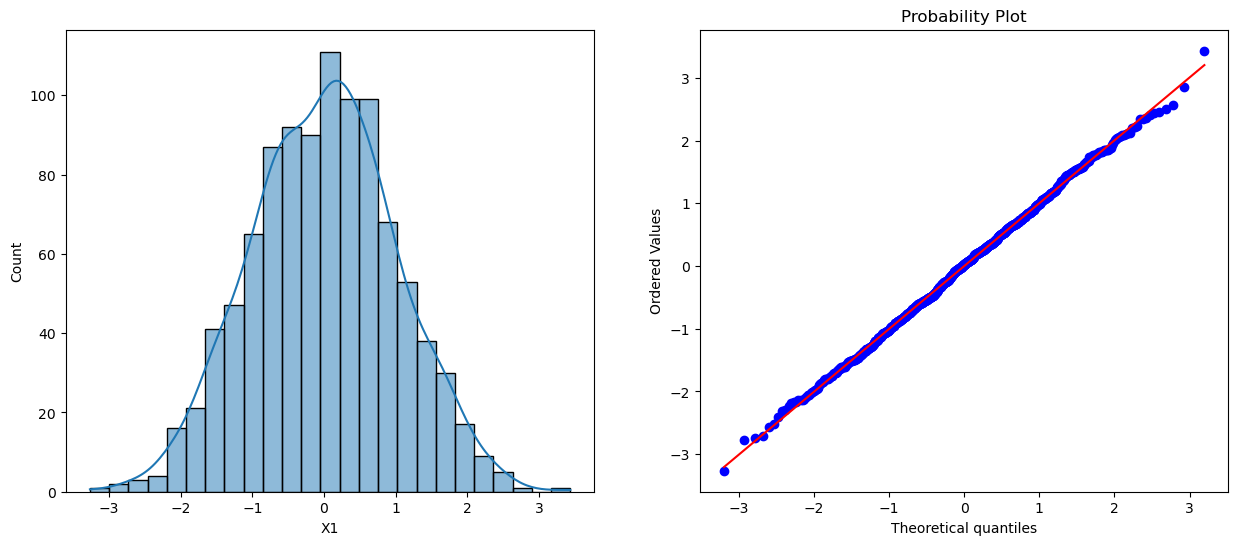

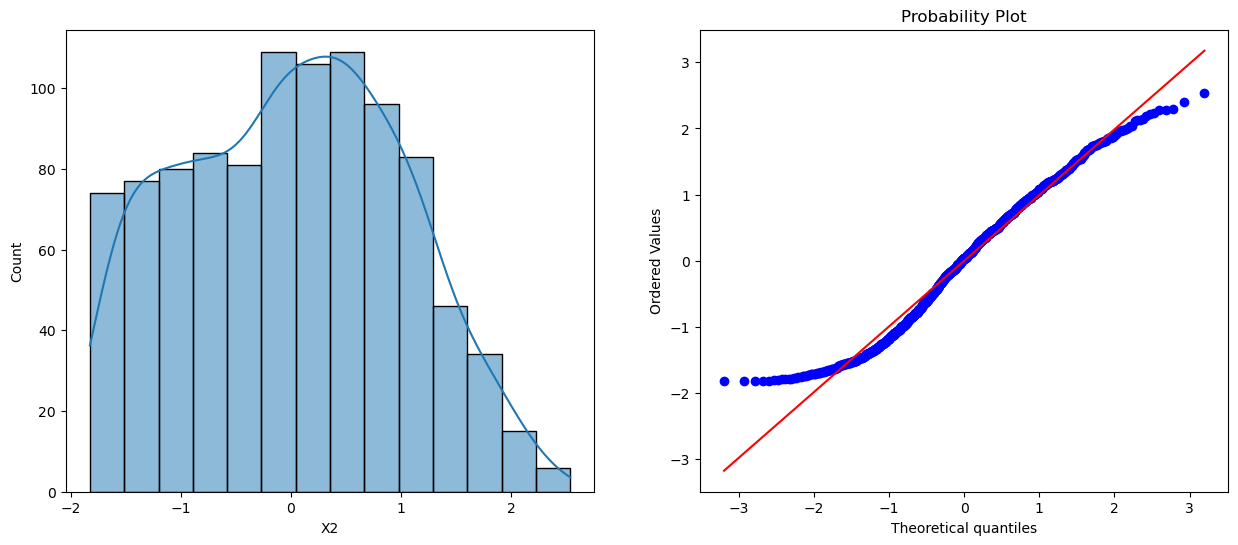

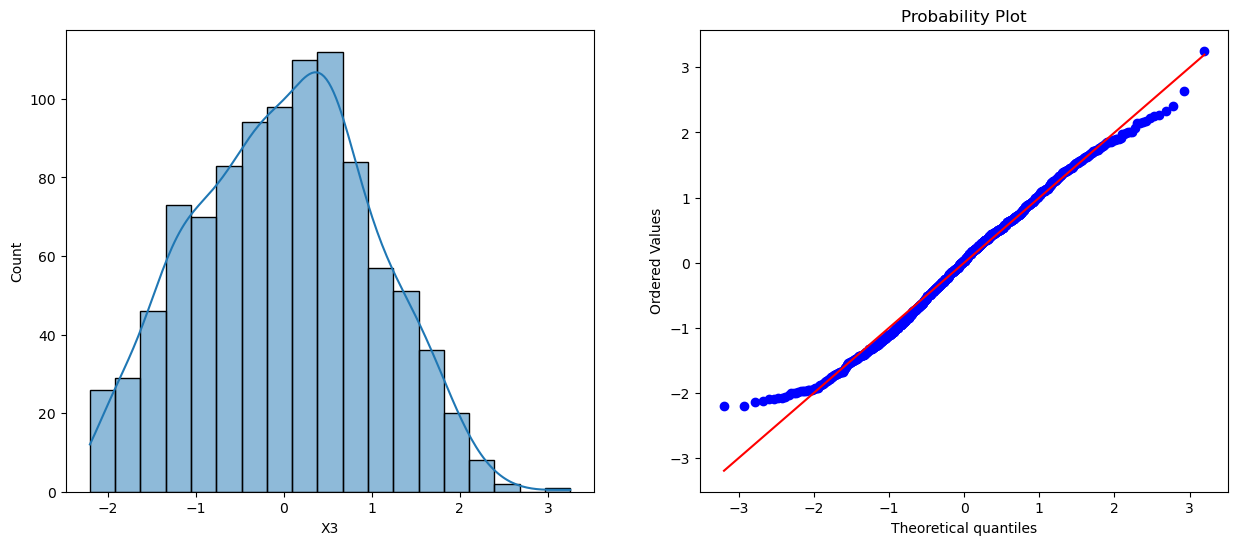

In [43]:
for col_ in X_trans.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(X_trans[col_],kde=True)
    plt.subplot(122)
    stats.probplot(X_trans[col_],dist="norm",plot=plt)

plt.show()

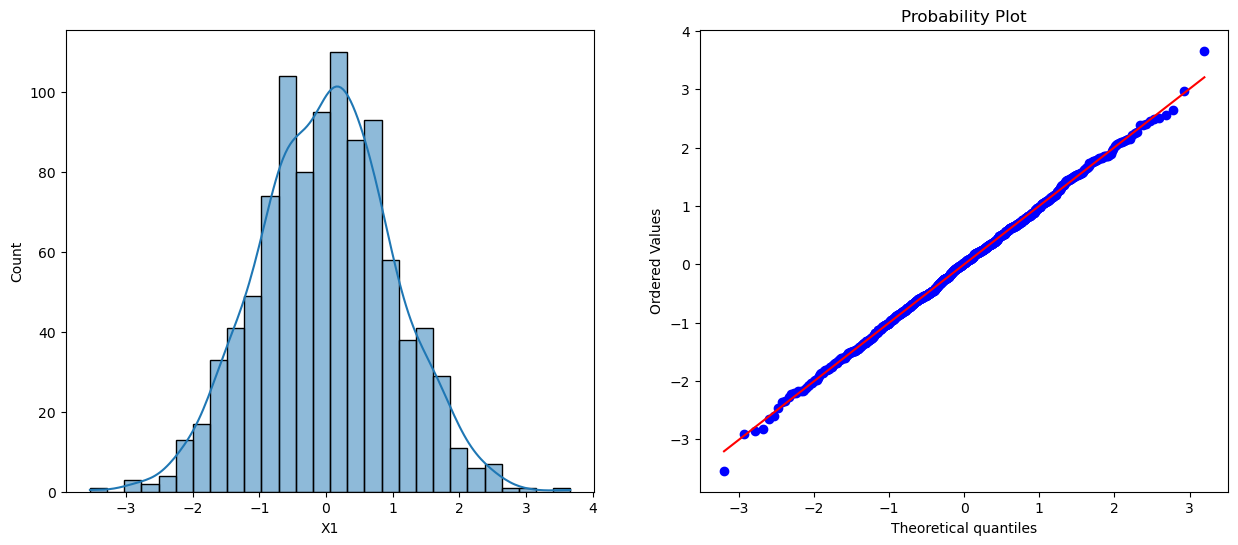

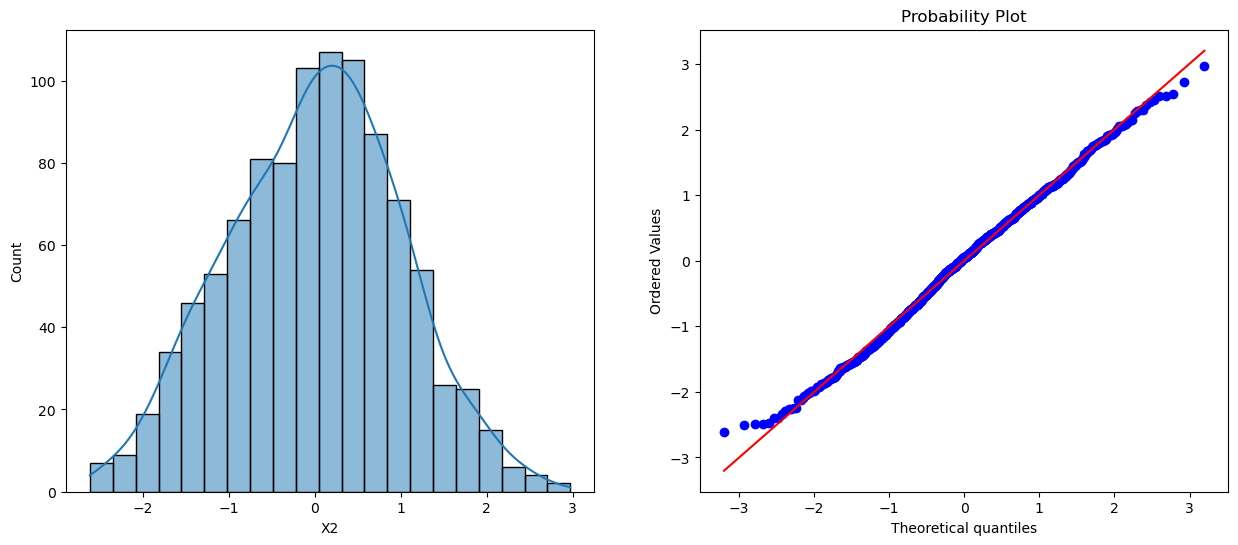

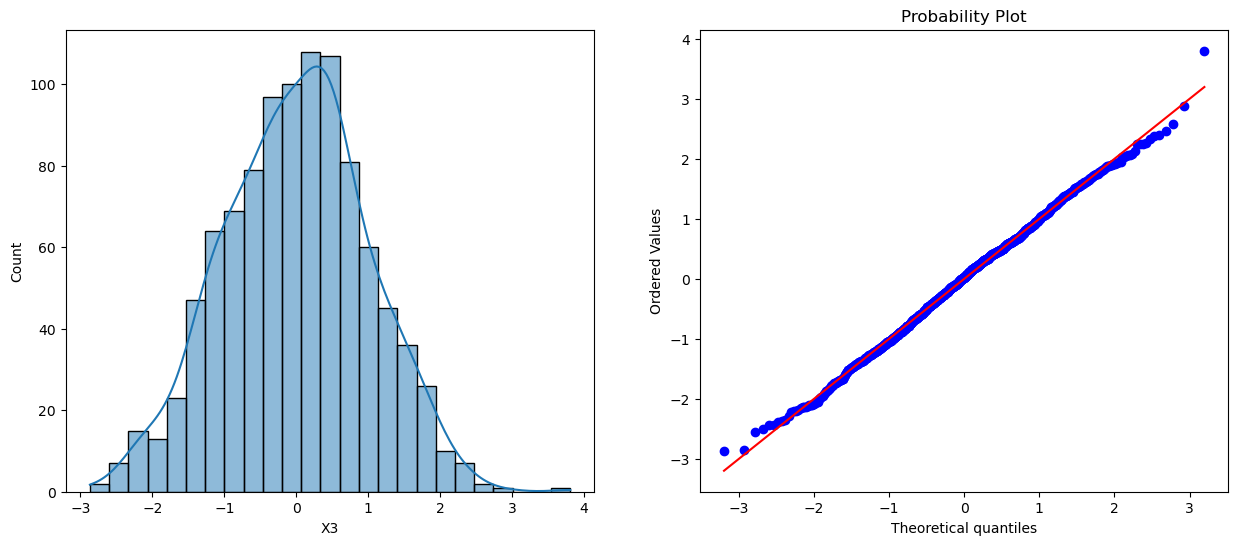

In [49]:
for col_ in X_trans1.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(X_trans1[col_],kde=True)
    plt.subplot(122)
    stats.probplot(X_trans1[col_],dist="norm",plot=plt)

plt.show()

In [44]:
pt = PowerTransformer(method='box-cox')

In [45]:
X_trans1 = pt.fit_transform(X)
X_trans1 = pd.DataFrame(X_trans1,columns=X.columns)
X_trans1

,X1,X2,X3
0,0.502914,-1.009999,-0.353431
1,-0.142559,-1.313867,-0.828985
2,0.654039,0.365769,0.091957
3,1.512881,0.561866,0.193780
4,-0.241433,-1.907399,-0.828782
...,...,...,...
995,-0.289977,-0.604679,1.882901
996,1.776356,-0.854712,-1.043097
997,0.647205,0.049825,-1.712181
998,-0.591909,-2.483197,-0.699626


In [59]:
pd.DataFrame({'X_cols':X_trans1.columns, 'box-cox':pt.lambdas_, 'Yeo-Johnson':tf1.named_transformers_['X'].lambdas_})

,X_cols,box-cox,Yeo-Johnson
0,X1,-0.078228,-0.322988
1,X2,0.259271,-0.332539
2,X3,0.283233,-0.094421


In [58]:
print(X.skew(),"\n")
print(X_trans.skew(), "\n")
print(X_trans1.skew())

X1    2.137689
X2    1.983789
X3    1.915604
dtype: float64 

X1    0.006177
X2    0.053669
X3    0.010580
dtype: float64 

X1   -0.000428
X2   -0.045138
X3   -0.020137
dtype: float64


In [60]:
print(X.kurt(),"\n")
print(X_trans.kurt(), "\n")
print(X_trans1.kurt())

X1    9.858854
X2    5.412459
X3    7.572622
dtype: float64 

X1   -0.140270
X2   -0.859325
X3   -0.591146
dtype: float64 

X1    0.039182
X2   -0.321434
X3   -0.144384
dtype: float64
